In [142]:
import pandas as pd

hr_df = pd.read_csv('hr_data.csv')
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [143]:
hr_df.shape

(14999, 9)

In [148]:
hr_df.dtypes

,0
employee_id,int64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
department,object
salary,object


In [147]:
hr_df.select_dtypes(exclude=["number"]).columns
hr_df.head()


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [149]:
#Display value in categorical columns
hr_df['department'].unique()
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [150]:
#load another dataset
emp_stats=pd.read_excel("employee_satisfaction_evaluation.xlsx")
emp_stats.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [151]:
emp_stats.shape

(14999, 3)

In [154]:
#Merge or Join the Tables
main_df=hr_df.set_index("employee_id").join(emp_stats.set_index("EMPLOYEE #"))
main_df= main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [156]:
#check any missing value
# main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [157]:
#Fill the missing values with the mean
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
main_dfs= main_df.select_dtypes(include=["number"])
main_df.fillna(main_dfs.mean(),inplace=True)

In [159]:
#copy the datasets
df=main_df.copy()
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [161]:
main_df.isna().value_counts()

,,,,,,,,,,,count
employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,
False,False,False,False,False,False,False,False,False,False,False,14999


In [162]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14999 non-null  float64
 10  last_evaluation        14999 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [163]:
#Removing employee id
main_df = main_df.drop(columns='employee_id')
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [164]:
main_df = main_df.drop(columns='salary')
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,0.38,0.53
1,5,262,6,0,1,0,sales,0.80,0.86
2,7,272,4,0,1,0,sales,0.11,0.88
3,5,223,5,0,1,0,sales,0.72,0.87
4,2,159,3,0,1,0,sales,0.37,0.52


In [165]:
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,0.38,0.53
1,5,262,6,0,1,0,sales,0.80,0.86
2,7,272,4,0,1,0,sales,0.11,0.88
3,5,223,5,0,1,0,sales,0.72,0.87
4,2,159,3,0,1,0,sales,0.37,0.52


In [166]:
#check each department by grupby
department_grp=main_df.groupby('department').sum()
department_grp

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [167]:
#check also with mean
mean_dep=main_df.groupby('department').mean()
mean_dep

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [168]:
#check the employee who left
main_df['department'].value_counts().reset_index()

,department,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [169]:
#check the employee who left
main_df['left'].value_counts()

,count
left,
0,11428
1,3571


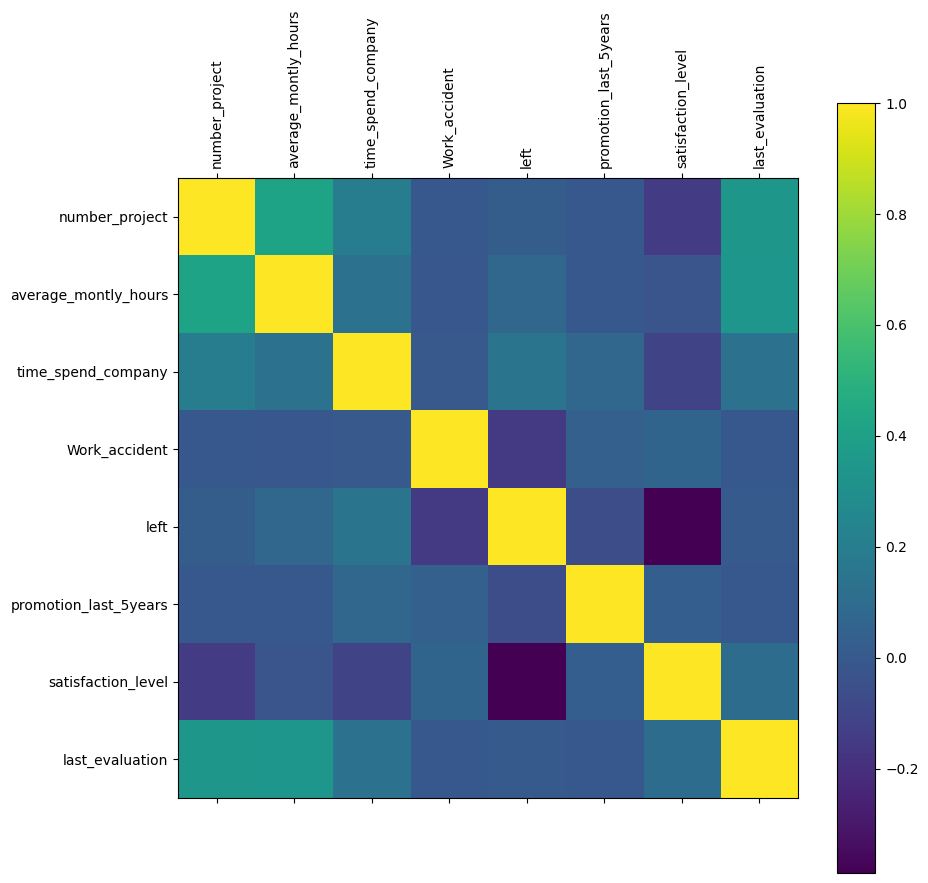

In [170]:
#Find the Corelation matrix
import matplotlib.pyplot as plt

def plot_rel(df, size=10):
    corr = df.select_dtypes(include='number').corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)

    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)

    plt.show()

plot_rel(main_df)


# **Preparing Dataset for Machine Learning**

In [171]:
main_dataFrame=pd.get_dummies(df,columns=['department','salary'],drop_first=True)
main_dataFrame.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,1003,2,157,3,0,1,0,0.38,0.53,False,False,False,False,False,False,True,False,False,True,False
1,1005,5,262,6,0,1,0,0.80,0.86,False,False,False,False,False,False,True,False,False,False,True
2,1486,7,272,4,0,1,0,0.11,0.88,False,False,False,False,False,False,True,False,False,False,True
3,1038,5,223,5,0,1,0,0.72,0.87,False,False,False,False,False,False,True,False,False,True,False
4,1057,2,159,3,0,1,0,0.37,0.52,False,False,False,False,False,False,True,False,False,True,False


In [172]:
main_dataFrame['left'].value_counts()

,count
left,
0,11428
1,3571


In [173]:
len(main_dataFrame.loc[main_dataFrame['left']==1])

3571

# **Train our dataset**

In [174]:
from sklearn.model_selection import train_test_split
X=main_dataFrame.drop(['left'],axis=1).values
y=main_dataFrame['left'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [175]:
#Normalise the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

df_train =pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.071777,2.587060,0.983762,0.340625,-0.413022,-0.148657,-2.063240,0.721656,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,3.854804,-0.62262,-0.41397,-0.467036,1.029092,-0.872176
1,-0.643942,0.159755,-0.940732,-0.343557,2.421176,-0.148657,-0.175855,-0.213024,-0.233765,-0.232629,-0.222206,4.578694,-0.241151,-0.259417,-0.62262,-0.41397,-0.467036,-0.971730,1.146558
2,-1.377627,-1.458448,-0.940732,-0.343557,-0.413022,-0.148657,-0.898683,-1.381375,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,2.141162,1.029092,-0.872176
3,1.253292,0.159755,-1.381761,0.340625,-0.413022,-0.148657,1.189488,-0.213024,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,-0.467036,-0.971730,1.146558
4,-0.112958,0.968857,1.244370,1.024807,-0.413022,-0.148657,0.828074,1.481084,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,2.141162,-0.971730,1.146558


# **Logistic Regression Model Training**

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [179]:
model = LogisticRegression(solver="lbfgs")
model.fit(X_train,y_train)
predication = model.predict(X_test)

print("Accuracy {0:.2f}".format(100*accuracy_score(y_test,predication)))
print(confusion_matrix(y_test,predication))
print(classification_report(y_test,predication))


Accuracy 79.13
[[3169  259]
 [ 680  392]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.60      0.37      0.46      1072

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.77      0.79      0.77      4500



# **Using Random Forest Classifier**

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

model=RandomForestClassifier()
model.fit(X_train,y_train)
predication=model.predict(X_test)

print("Accuracy {0:.2f}".format(100*accuracy_score(y_test,predication)))
print(confusion_matrix(y_test,predication))
print(classification_report(y_test,predication))

Accuracy 98.27
[[3412   16]
 [  62 1010]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.98      0.94      0.96      1072

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [216]:
main_dataFrame.drop(['left'],axis=1).columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'satisfaction_level', 'last_evaluation', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [217]:
import pandas as pd
feature_importances=pd.DataFrame(model.feature_importances_,index=pd.DataFrame(X_train).columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
6,0.267314
0,0.238023
1,0.135496
3,0.134156
2,0.099502
7,0.093512
4,0.007114
17,0.005380
16,0.003137
18,0.002902


In [181]:
#Using Deep Learning
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [196]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [205]:
model = Sequential()
model.add(Dense(9,kernel_initializer="uniform",activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [206]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 9)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190 (760.00 B)

 Trainable params: 190 (760.00 B)

 Non-trainable params: 0 (0.00 B)

In [207]:
history = model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=25,
    validation_data=(X_test, y_test),
    verbose=1
)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7692 - loss: 0.5456 - val_accuracy: 0.8924 - val_loss: 0.3072
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9107 - loss: 0.2696 - val_accuracy: 0.9213 - val_loss: 0.2376
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9333 - loss: 0.2074 - val_accuracy: 0.9342 - val_loss: 0.2078
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9452 - loss: 0.1797 - val_accuracy: 0.9402 - val_loss: 0.1893
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9467 - loss: 0.1605 - val_accuracy: 0.9471 - val_loss: 0.1756
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9455 - loss: 0.1579 - val_accuracy: 0.9493 - val_loss: 0.1628
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9572 - loss: 0.1354 - val_accuracy: 0.9531 - val_loss: 0.1506
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9568 - loss: 0.1325 - 

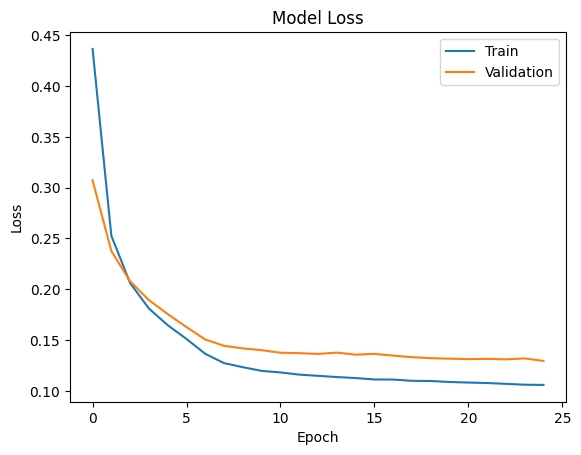

In [208]:
#plotting our loss charts
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

Text(0.5, 0, 'Epoch')

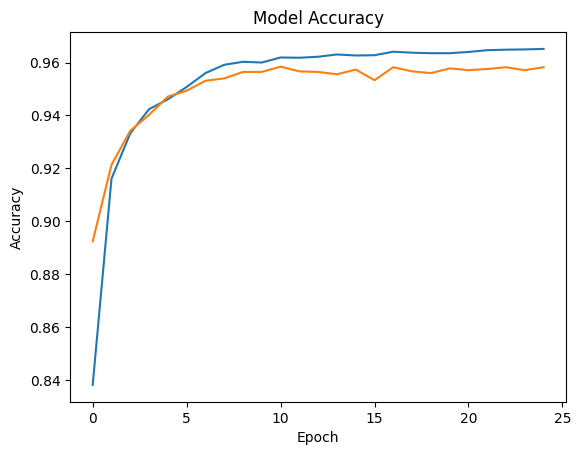

In [209]:
#plotting our accuarcy charts
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')